Phase 4 Project Notebook by Ryan S. Chung

# Introduction

In [1]:
import pandas as pd
import numpy as np
import os , shutil
import glob

In [2]:
import cv2
import matplotlib.image as mpimg

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.image as mpimg

In [5]:
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initial MLP Creation

In [7]:
NORMAL = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [8]:
data = []
labels = []

In [9]:
for i in NORMAL:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    
for i in PNEUMONIA:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [10]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Label: 0


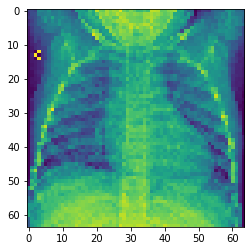

In [11]:
sample_image = X_train[0]
sample_label = y_train[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

In [12]:
sample_image

array([[ 47,  58,  53, ...,  93,  92,  84],
       [ 37,  60,  63, ..., 102,  99,  94],
       [ 43,  54,  63, ..., 119, 108,  86],
       ...,
       [ 90, 144, 124, ..., 154, 111,   0],
       [ 73, 147, 154, ..., 160, 107,   0],
       [ 72, 136, 152, ..., 175,  81,   0]], dtype=uint8)

In [13]:
print(X_train.shape)
X_test.shape

(4172, 64, 64)


(1044, 64, 64)

In [14]:
X_train = X_train.reshape(4172, 4096).astype('float')
X_test = X_test.reshape(1044, 4096).astype('float')

In [15]:
print(X_train.shape)
X_test.shape

(4172, 4096)


(1044, 4096)

In [16]:
X_train /= 255.
X_test /= 255.

In [17]:
y_train[:2]

array([0, 1])

In [18]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [19]:
y_train[0]

array([1., 0.], dtype=float32)

In [20]:
Model_1 = Sequential()
Model_1.add(Dense(64, activation = 'tanh', input_shape = (4096,)))
Model_1.add(Dense(2, activation = 'softmax'))

In [21]:
Model_1.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [22]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 262,338
Trainable params: 262,338
Non-trainable params: 0
_________________________________________________________________


In [23]:
results_1 = Model_1.fit(X_train, y_train, epochs = 12, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 4ms/step - loss: 0.5561 - acc: 0.7529 - val_loss: 0.5662 - val_acc: 0.7098
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3878 - acc: 0.8334 - val_loss: 0.4296 - val_acc: 0.7653
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3285 - acc: 0.8627 - val_loss: 0.3982 - val_acc: 0.8008
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2557 - acc: 0.8943 - val_loss: 0.2607 - val_acc: 0.8985
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2309 - acc: 0.9106 - val_loss: 0.3213 - val_acc: 0.8467
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2371 - acc: 0.9036 - val_loss: 0.2913 - val_acc: 0.8678
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1949 - acc: 0.9219 - val_loss: 0.4719 - val_acc: 0.7864
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1897 - acc: 0.92

In [24]:
def visualize_training_results(results):
    
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

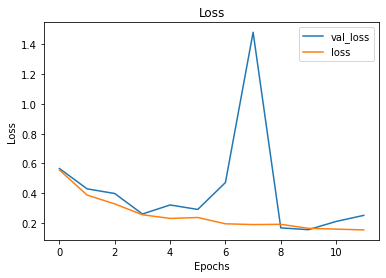

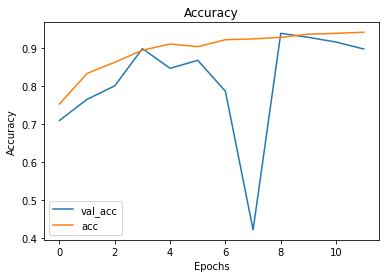

In [25]:
visualize_training_results(results_1)

In [26]:
Model_2 = Sequential()
Model_2.add(Dense(64, activation='tanh', input_shape=(4096,)))
Model_2.add(Dense(32, activation='tanh'))
Model_2.add(Dense(2, activation='softmax'))

In [27]:
Model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [28]:
Model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [29]:
results_2 = Model_2.fit(X_train, y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.5031 - acc: 0.7639 - val_loss: 0.5928 - val_acc: 0.6743
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3706 - acc: 0.8442 - val_loss: 1.4688 - val_acc: 0.2807
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3186 - acc: 0.8739 - val_loss: 0.2409 - val_acc: 0.9186
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2620 - acc: 0.8957 - val_loss: 0.4048 - val_acc: 0.8084
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2676 - acc: 0.8859 - val_loss: 0.4948 - val_acc: 0.7854
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2290 - acc: 0.9099 - val_loss: 0.1812 - val_acc: 0.9243
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1929 - acc: 0.9233 - val_loss: 0.2084 - val_acc: 0.9243
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1846 - acc: 0.92

In [30]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

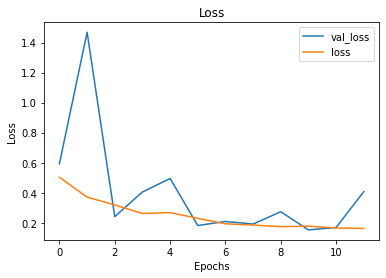

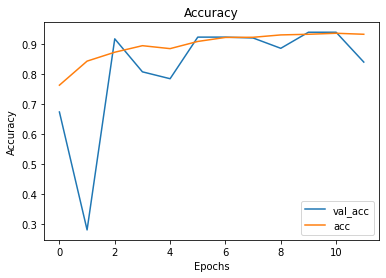

In [31]:
visualize_training_results(results_2)

In [32]:
Model_3 = Sequential()
Model_3.add(Dense(64, activation='relu', input_shape=(4096,)))
Model_3.add(Dense(32, activation='relu'))
Model_3.add(Dense(2, activation='softmax'))

In [33]:
Model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [34]:
Model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [35]:
results_3 = Model_3.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.4928 - acc: 0.7730 - val_loss: 0.3846 - val_acc: 0.7874
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.4038 - acc: 0.8186 - val_loss: 0.6561 - val_acc: 0.6331
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3177 - acc: 0.8703 - val_loss: 0.3013 - val_acc: 0.8918
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2871 - acc: 0.8792 - val_loss: 0.2045 - val_acc: 0.9291
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2371 - acc: 0.9039 - val_loss: 0.4067 - val_acc: 0.8190
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2223 - acc: 0.9080 - val_loss: 0.2018 - val_acc: 0.9234
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2232 - acc: 0.9132 - val_loss: 0.2062 - val_acc: 0.9148
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1966 - acc: 0.92

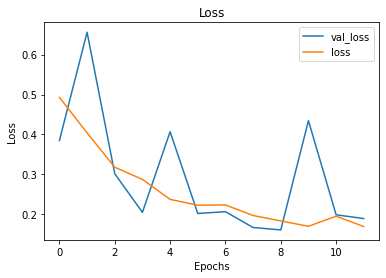

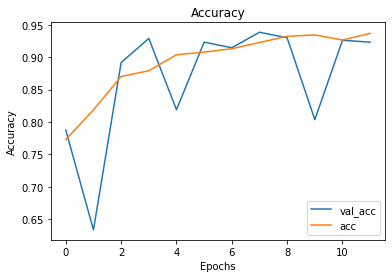

In [36]:
visualize_training_results(results_3)

# Creation of CNN

In [37]:
# Creating a Baseline CNN

In [38]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test",
    target_size=(64, 64), batch_size = 180)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val",
    target_size=(64, 64), batch_size = 200)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train",
    target_size=(64, 64), batch_size = 200)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [39]:
# Creating the data sets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [40]:
# Explore your dataset again

m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 200
Number of testing samples: 180
Number of validation samples: 16
train_images shape: (200, 64, 64, 3)
train_labels shape: (200, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [41]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(200, 12288)
(180, 12288)
(16, 12288)


In [42]:
train_y = np.reshape(train_labels[:,0], (200,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [43]:
# Build a baseline fully connected model

from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
7/7 [==============================] - 0s 16ms/step - loss: 0.6220 - accuracy: 0.7200 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5722 - accuracy: 0.7200 - val_loss: 0.6794 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7200 - val_loss: 0.6664 - val_accuracy: 0.5625
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7300 - val_loss: 0.7765 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.7250 - val_loss: 0.6308 - val_accuracy: 0.8125
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7450 - val_loss: 1.0571 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7600 - val_loss: 0.7056 - val_accuracy: 0.5625
Epoch 8/50
7/7 [=================

In [45]:
results_train = model.evaluate(train_img, train_y)

7/7 [==============================] - 0s 714us/step - loss: 0.6812 - accuracy: 0.7150


In [46]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 833us/step - loss: 0.6812 - accuracy: 0.7111


In [47]:
results_train

[0.6811686158180237, 0.7149999737739563]

In [48]:
results_test

[0.681194543838501, 0.7111111283302307]

In [49]:
# Building a CNN

In [50]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6709 - acc: 0.6550 - val_loss: 0.7086 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6231 - acc: 0.7200 - val_loss: 0.7368 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6074 - acc: 0.7200 - val_loss: 0.7687 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5995 - acc: 0.7200 - val_loss: 0.8082 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6001 - acc: 0.7200 - val_loss: 0.8187 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5964 - acc: 0.7200 - val_loss: 0.7922 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5958 - acc: 0.7200 - val_loss: 0.7846 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5918 - acc: 0.7200 - val

In [51]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.5301 - acc: 0.7200


In [52]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 0.5389 - acc: 0.7222


In [53]:
results_train

[0.5300886034965515, 0.7200000286102295]

In [54]:
results_test

[0.5389469861984253, 0.7222222089767456]

# Grid Search Tuning

# Transfer Learning

# Summary

# Misc

X = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\NORMAL\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X.append (image)
print('X shape:', np.array(X).shape)

y = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\PNEUMONIA\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    y.append (image)
print('y shape:', np.array(y).shape)

load image as pixel array
image = image.imread("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\IM-0151-0001.jpeg")
summarize shape of the pixel array
print(image.dtype)
print(image.shape)
display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()